In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import the Chicago dataset
chicago = pd.read_csv(r"C:\Users\HP\Desktop\File\crime_data_chicago.csv")

In [3]:
chicago.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
chicago.shape

(2278726, 23)

In [5]:
# Taking a 70% random sample from our Chicago dataset
chicago_df = chicago.sample(frac = 0.7, random_state= 1)

In [6]:
# Understanding our data set
# see the number of rows and columns
chicago_df.shape

(1595108, 23)

In [7]:
# drop redundant columns
chicago_df.drop(columns = ["Unnamed: 0","ID","Latitude","Longitude","X Coordinate","Y Coordinate"], axis =1, inplace = True)

In [8]:
chicago_df.reset_index()
chicago_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
237896,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)"
1801776,HH578795,08/13/2002 09:30:00 PM,077XX S RIDGELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,414,4.0,8.0,43.0,14,2002,02/28/2018 03:56:25 PM,"(41.754268012, -87.582155675)"
1258135,HY460862,10/13/2015 07:30:00 PM,067XX S ARTESIAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,832,8.0,15.0,66.0,08B,2015,02/10/2018 03:50:01 PM,"(41.770962966, -87.684637876)"
2223942,HN595456,09/18/2007 01:56:00 AM,087XX S COMMERCIAL AVE,1220,DECEPTIVE PRACTICE,THEFT OF LOST/MISLAID PROP,SIDEWALK,True,False,423,4.0,10.0,46.0,11,2007,02/28/2018 03:56:25 PM,"(41.736664051, -87.551415568)"
2121997,HW173766,02/28/2013 02:00:00 PM,036XX N SOUTHPORT AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,DRUG STORE,False,False,1923,19.0,44.0,6.0,11,2013,02/10/2018 03:50:01 PM,"(41.947857457, -87.664033932)"


In [9]:
chicago_df.dtypes

Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
Year                      int64
Updated On               object
Location                 object
dtype: object

In [10]:
# Check for missing values 
chicago_df.isna().sum()

Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2014
Arrest                       0
Domestic                     0
Beat                         0
District                     9
Ward                    129216
Community Area          128921
FBI Code                     0
Year                         0
Updated On                   0
Location                 16711
dtype: int64

In [11]:
# Check for duplicate rows
chicago_df.duplicated().sum()

6

In [12]:
chicago_df.loc[chicago_df.duplicated()]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
498162,HV341781,06/19/2012 01:12:00 AM,012XX N MASON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2531,25.0,29.0,25.0,01A,2012,03/18/2019 04:08:09 PM,"(41.902618024, -87.774168158)"
2218947,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,925,9.0,11.0,61.0,01A,2003,03/18/2019 04:08:09 PM,"(41.822967958, -87.641048569)"
2150059,JA206252,03/30/2017 04:32:00 PM,027XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,334,3.0,7.0,43.0,01A,2017,03/18/2019 04:08:09 PM,"(41.760080391, -87.558186925)"
1364693,G703238,11/23/2001 08:30:00 AM,112XX S GREEN STREET,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,2233,22.0,NaN,NaN,01A,2001,03/19/2019 04:11:22 PM,"(41.689771618, -87.643514659)"
126290,HR146859,01/31/2009 01:10:00 AM,039XX W ARGYLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,1712,17.0,39.0,14.0,01A,2009,03/19/2019 04:11:22 PM,"(41.971902506, -87.726290051)"
502351,HK172551,02/08/2004 11:44:00 PM,034XX W MADISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,03/19/2019 04:11:22 PM,"(41.880908996, -87.711842908)"


In [13]:
# Fnd duplicate case number
chicago_df.loc[chicago_df.duplicated(subset= ["Case Number"])]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
1648799,JF259064,05/28/2022 05:33:00 PM,055XX S BISHOP ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,713,7.0,16.0,67.0,01A,2022,06/04/2022 04:49:12 PM,"(41.793200818, -87.660922087)"
1499444,G614514,10/13/2001 01:44:00 AM,107XX S PERRY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,513,5.0,34.0,49.0,01A,2001,03/19/2019 04:11:22 PM,"(41.699035036, -87.625674408)"
767267,JB359724,07/21/2018 11:33:00 PM,031XX W FULTON BLVD,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,1222,12.0,27.0,27.0,01A,2018,03/18/2019 04:08:09 PM,"(41.886444966, -87.704433324)"
498162,HV341781,06/19/2012 01:12:00 AM,012XX N MASON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2531,25.0,29.0,25.0,01A,2012,03/18/2019 04:08:09 PM,"(41.902618024, -87.774168158)"
238427,HS313197,05/18/2010 06:37:00 AM,031XX W 48TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,911,9.0,14.0,58.0,01A,2010,03/19/2019 04:11:22 PM,"(41.805185857, -87.702166016)"
1064264,HS638640,11/30/2010 12:55:00 AM,111XX S BELL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,2212,22.0,19.0,75.0,01A,2010,03/19/2019 04:11:22 PM,"(41.691515662, -87.677502582)"
718478,HV303630,05/25/2012 11:50:00 PM,065XX S KENWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,321,3.0,20.0,42.0,01A,2012,03/18/2019 04:08:09 PM,"(41.776070273, -87.592969398)"
862166,HJ309452,04/19/2003 04:35:00 AM,003XX E 51ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,232,2.0,3.0,40.0,01A,2003,03/19/2019 04:11:22 PM,"(41.802059097, -87.619047858)"
1743777,JD298408,07/15/2020 04:11:00 PM,069XX S THROOP ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,734,7.0,6.0,67.0,01A,2020,05/13/2021 04:59:17 PM,"(41.767960994, -87.656618275)"
1635303,HY259141,06/10/2015 12:01:00 AM,002XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,513,5.0,34.0,49.0,01A,2015,03/18/2019 04:08:09 PM,"(41.699802541, -87.629100771)"


In [14]:
chicago_df.dropna(subset =["Case Number"], inplace= True)

In [15]:
# confirm if truly duplicated rows exist using case number
chicago_df[chicago_df["Case Number"].str.contains("HK172551")]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
74485,HK172551,02/08/2004 11:44:00 PM,034XX W MADISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,03/19/2019 04:11:22 PM,"(41.880908996, -87.711842908)"
502351,HK172551,02/08/2004 11:44:00 PM,034XX W MADISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,03/19/2019 04:11:22 PM,"(41.880908996, -87.711842908)"


In [16]:
# Exclude duplicate rows
chicago_df1 = chicago_df.loc[~chicago_df.duplicated(subset = ["Case Number"])].reset_index(drop = True)
chicago_df1.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
0,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)"
1,HH578795,08/13/2002 09:30:00 PM,077XX S RIDGELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,414,4.0,8.0,43.0,14,2002,02/28/2018 03:56:25 PM,"(41.754268012, -87.582155675)"
2,HY460862,10/13/2015 07:30:00 PM,067XX S ARTESIAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,832,8.0,15.0,66.0,08B,2015,02/10/2018 03:50:01 PM,"(41.770962966, -87.684637876)"
3,HN595456,09/18/2007 01:56:00 AM,087XX S COMMERCIAL AVE,1220,DECEPTIVE PRACTICE,THEFT OF LOST/MISLAID PROP,SIDEWALK,True,False,423,4.0,10.0,46.0,11,2007,02/28/2018 03:56:25 PM,"(41.736664051, -87.551415568)"
4,HW173766,02/28/2013 02:00:00 PM,036XX N SOUTHPORT AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,DRUG STORE,False,False,1923,19.0,44.0,6.0,11,2013,02/10/2018 03:50:01 PM,"(41.947857457, -87.664033932)"


In [17]:
chicago_df1.shape

(1595086, 17)

In [18]:
chicago_df1.isna().sum()

Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2014
Arrest                       0
Domestic                     0
Beat                         0
District                     9
Ward                    129215
Community Area          128920
FBI Code                     0
Year                         0
Updated On                   0
Location                 16710
dtype: int64

In [19]:
# Feature Understanding and Relationships

In [20]:
# year with most highest number of crimes
chicago_df1['Year'].value_counts().idxmax()

2001

In [21]:
# number of Narcotics arrest by location distribution
chicago_df1[chicago_df1['Primary Type'] == 'NARCOTICS']['Location Description'].value_counts()

Location Description
STREET                                             55368
SIDEWALK                                           48447
ALLEY                                               9890
RESIDENCE                                           5912
VEHICLE NON-COMMERCIAL                              4586
                                                   ...  
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA        1
SCHOOL - PRIVATE BUILDING                              1
AIRCRAFT                                               1
POOL ROOM                                              1
AIRPORT EXTERIOR - SECURE AREA                         1
Name: count, Length: 114, dtype: int64

In [22]:
chicago_df1[chicago_df1['Arrest'] == True] # filtered df that shows only rows where arrest is true

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
0,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)"
3,HN595456,09/18/2007 01:56:00 AM,087XX S COMMERCIAL AVE,1220,DECEPTIVE PRACTICE,THEFT OF LOST/MISLAID PROP,SIDEWALK,True,False,423,4.0,10.0,46.0,11,2007,02/28/2018 03:56:25 PM,"(41.736664051, -87.551415568)"
5,HK224824,03/07/2004 01:12:04 AM,025XX E 87TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,True,False,423,4.0,7.0,46.0,08B,2004,02/28/2018 03:56:25 PM,"(41.737250273, -87.561814019)"
8,HS485740,08/27/2010 11:45:00 PM,012XX N PULASKI RD,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,2534,25.0,27.0,23.0,18,2010,02/10/2018 03:50:01 PM,"(41.902899152, -87.72630861)"
21,HW170526,02/25/2013 10:18:00 PM,034XX W FOSTER AVE,2027,NARCOTICS,POSS: CRACK,VEHICLE NON-COMMERCIAL,True,False,1712,17.0,39.0,13.0,18,2013,02/10/2018 03:50:01 PM,"(41.975686466, -87.7139048)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595061,HH198117,02/20/2002 01:35:00 PM,010XX W FOSTER AV,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,2023,20.0,NaN,NaN,16,2002,02/28/2018 03:56:25 PM,"(41.976366488, -87.656920881)"
1595062,HJ429519,06/14/2003 10:10:57 PM,014XX W 13TH ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,CHA HALLWAY/STAIRWELL/ELEVATOR,True,False,1231,12.0,2.0,28.0,26,2003,02/28/2018 03:56:25 PM,"(41.865132942, -87.662687356)"
1595066,HR206863,03/09/2009 06:15:00 PM,045XX N WESTERN AVE,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,True,False,1911,19.0,47.0,4.0,26,2009,02/28/2018 03:56:25 PM,"(41.96357226, -87.688747261)"
1595078,JC513428,11/16/2019 11:30:00 PM,011XX W LAWRENCE AVE,0460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,True,False,2033,20.0,46.0,3.0,08B,2019,11/23/2019 03:51:46 PM,"(41.969046206, -87.658064717)"


In [23]:
# What are the most common types of crime in Chicago?
crime_by_type = chicago_df1.groupby(['Primary Type']).size().sort_values(ascending=False)
crime_by_type

Primary Type
THEFT                                335261
BATTERY                              292686
CRIMINAL DAMAGE                      182290
NARCOTICS                            155777
ASSAULT                              103315
OTHER OFFENSE                         98919
BURGLARY                              88069
MOTOR VEHICLE THEFT                   74431
DECEPTIVE PRACTICE                    69767
ROBBERY                               59807
CRIMINAL TRESPASS                     44488
WEAPONS VIOLATION                     21172
PROSTITUTION                          14594
OFFENSE INVOLVING CHILDREN            11418
PUBLIC PEACE VIOLATION                10869
SEX OFFENSE                            6150
CRIM SEXUAL ASSAULT                    5821
INTERFERENCE WITH PUBLIC OFFICER       3820
LIQUOR LAW VIOLATION                   3136
GAMBLING                               3047
ARSON                                  2696
HOMICIDE                               2506
KIDNAPPING         

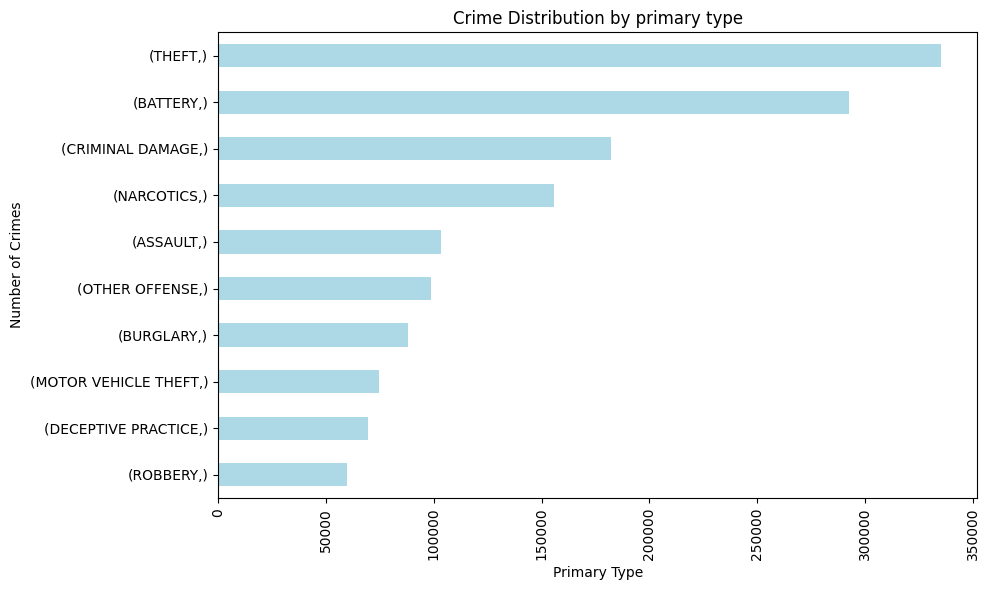

In [24]:
# Patterns in types of crime?
crime_distribution = chicago_df1[["Primary Type"]].value_counts().head(10).sort_values(ascending =True)

plt.figure(figsize=(10, 6))
crime_distribution.plot(kind='barh', color='lightblue')
plt.title('Crime Distribution by primary type')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

In [25]:
pip install scipy

<Axes: xlabel='Location Description'>

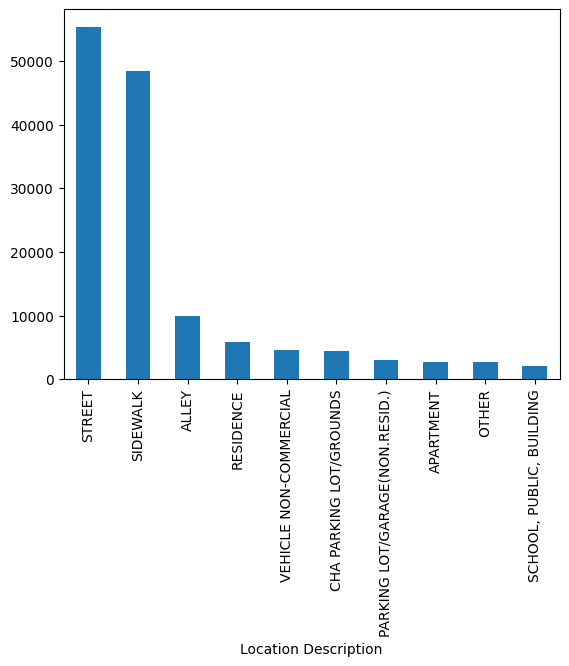

In [26]:
# frequency distribution for the 10 most frequent locations for narcotics arrest
chicago_df1[chicago_df1['Primary Type'] == 'NARCOTICS']['Location Description'].value_counts()[:10].plot.bar()

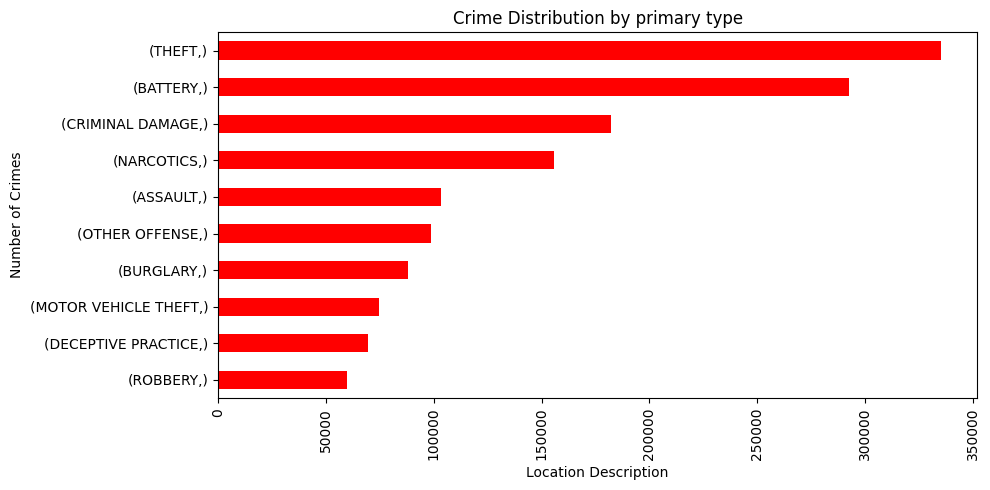

In [27]:
crime_distribution = chicago_df1[["Primary Type"]].value_counts().head(10).sort_values(ascending =True)

plt.figure(figsize=(10, 5))
crime_distribution.plot(kind='barh', color='red')
plt.title('Crime Distribution by primary type')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'counts')

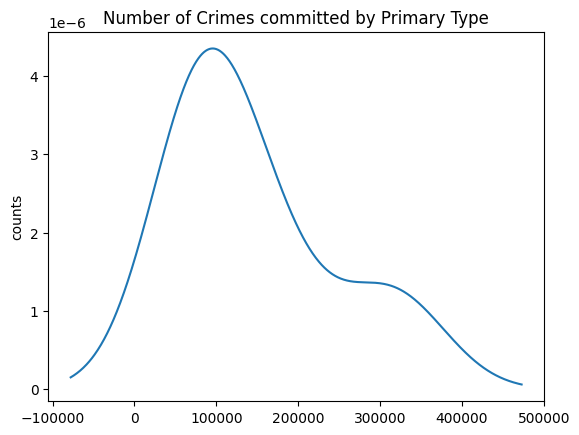

In [28]:
# the distribution of the top 10 primary types of crimes in the Chicago crime
ax = chicago_df1[["Primary Type"]].value_counts().head(10).plot(kind = "kde", title = "Number of Crimes committed by Primary Type")
ax.set_ylabel("counts")

In [29]:
# Feature Relationships

In [30]:
import seaborn as sns
#sns.scatterplot(x= "Primary Type", y= "Location Description", hue = "Block" , data = chicago_df1)

In [31]:
# Functions to create new columns for day,month and season 
def extract_date_time(dataset, date):
    date_extract = pd.to_datetime(dataset[date], format='%m/%d/%Y %I:%M:%S %p')
    month_to_season = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Fall',
        10: 'Fall', 11: 'Fall', 12: 'Winter'
    }

    dataset['Day'] = date_extract.dt.day_name()
    dataset['Month'] = date_extract.dt.month_name()
    dataset['Season'] = date_extract.dt.month.map(month_to_season)
    return dataset['Day'], dataset['Month'], dataset['Season']

In [32]:
date_time = extract_date_time(chicago_df1,"Date") # running the 'extract date' function
chicago_df1.head(3)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location,Day,Month,Season
0,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)",Thursday,July,Summer
1,HH578795,08/13/2002 09:30:00 PM,077XX S RIDGELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,414,4.0,8.0,43.0,14,2002,02/28/2018 03:56:25 PM,"(41.754268012, -87.582155675)",Tuesday,August,Summer
2,HY460862,10/13/2015 07:30:00 PM,067XX S ARTESIAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,832,8.0,15.0,66.0,08B,2015,02/10/2018 03:50:01 PM,"(41.770962966, -87.684637876)",Tuesday,October,Fall


In [33]:
#How does the frequency of crime vary over time? (daily, weekly, monthly, yearly)
crime_by_day2 = chicago_df1.groupby(['Day']).size().sort_values(ascending=False) #by day
crime_by_day2

Day
Friday       239209
Wednesday    229678
Tuesday      228562
Saturday     228383
Thursday     227276
Monday       225047
Sunday       216931
dtype: int64

In [34]:
crime_by_month2 = chicago_df1.groupby(['Month']).size().sort_values(ascending=False) #by month
crime_by_month2

Month
July         149306
August       144456
June         143706
May          143294
October      136814
September    135295
March        132218
April        131457
January      126052
November     123581
December     117859
February     111048
dtype: int64

In [35]:
crime_by_season2 = chicago_df1.groupby(['Season']).size().sort_values(ascending=False) #by season
crime_by_season2

Season
Summer    437468
Spring    406969
Fall      395690
Winter    354959
dtype: int64

Text(0, 0.5, 'counts')

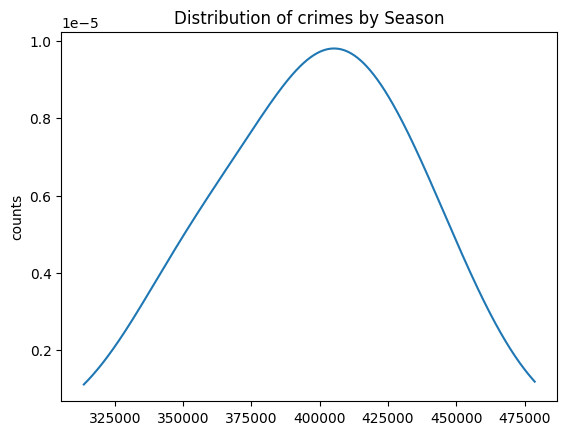

In [36]:
ax = crime_by_season2.plot(kind = "kde", title = "Distribution of crimes by Season")
ax.set_ylabel("counts") # plot of the distribution of crimes by season in the crime_by_season2 dataset

In [37]:
# Crimes that occurs the most by day of the week
crime_by_day1 = chicago_df1.groupby(["Day", "Primary Type"]).size().sort_values(ascending= False)
crime_by_day1.head(5)

Day        Primary Type
Friday     THEFT           51470
Tuesday    THEFT           48819
Wednesday  THEFT           48620
Monday     THEFT           48403
Sunday     BATTERY         48342
dtype: int64

In [38]:
# Crimes that occurs the most by month
crime_by_month1 = chicago_df1.groupby(["Month", "Primary Type"]).size().sort_values(ascending= False)
crime_by_month1.head(5)

Month      Primary Type
July       THEFT           32786
August     THEFT           32172
June       THEFT           30186
October    THEFT           29624
September  THEFT           29382
dtype: int64

In [39]:
# Crimes that occurs the most by season
crime_by_season1 = chicago_df1.groupby(["Season", "Primary Type"]).size().sort_values(ascending= False)
crime_by_season1.head(5)

Season  Primary Type
Summer  THEFT           95144
Fall    THEFT           85751
Summer  BATTERY         83363
Spring  THEFT           80896
        BATTERY         78038
dtype: int64

In [40]:
## How does the frequency of crime vary over time by primary type? (daily, weekly, monthly, yearly)
def crime_count_by_day_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_day = filtered_df.groupby(["Primary Type", "Day"]).size().sort_values(ascending= False)
    return crime_by_day

def crime_count_by_month_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_month = filtered_df.groupby(["Primary Type", "Month"]).size().sort_values(ascending= False)
    return crime_by_month

def crime_count_by_season_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_season = filtered_df.groupby(["Primary Type", "Season"]).size().sort_values(ascending= False)
    return crime_by_season 

def crime_count_by_year_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_year = filtered_df.groupby(["Primary Type", "Year"]).size().sort_values(ascending= False)
    return crime_by_year

In [41]:
# Function to check the day of the week for the highest occurrence of crime for different crimes
crime_by_day_theft = crime_count_by_day_for_primary_type(chicago_df1, "THEFT")
print(crime_by_day_theft)

Primary Type  Day      
THEFT         Friday       51470
              Tuesday      48819
              Wednesday    48620
              Monday       48403
              Thursday     48088
              Saturday     47840
              Sunday       42021
dtype: int64


In [42]:
# Function to check the month with the highest occurrence of crime for different crimes
crime_by_month_theft = crime_count_by_month_for_primary_type(chicago_df1, "BURGLARY")
print(crime_by_month_theft)

Primary Type  Month    
BURGLARY      August       8381
              July         8250
              October      8237
              September    7816
              June         7707
              May          7615
              November     7578
              December     7312
              January      6900
              April        6518
              March        6304
              February     5451
dtype: int64


In [43]:
# Check the day of the week for the highest occurrence of crime for different crimes
crime_by_season_theft = crime_count_by_season_for_primary_type(chicago_df1, "BATTERY")
print(crime_by_season_theft)

Primary Type  Season
BATTERY       Summer    83363
              Spring    78038
              Fall      70168
              Winter    61117
dtype: int64


In [44]:
crime_by_year_theft = crime_count_by_year_for_primary_type(chicago_df1, "THEFT") ## Check the year for the highest occurrence of crime for different crimes
print(crime_by_year_theft)

Primary Type  Year
THEFT         2001    20908
              2003    20863
              2002    20549
              2004    20146
              2008    18477
              2006    18123
              2005    18037
              2007    17795
              2009    16858
              2010    15989
              2011    15812
              2012    15600
              2013    14917
              2018    13643
              2017    13526
              2019    13203
              2016    13070
              2014    12852
              2015    11861
              2021     8621
              2020     8481
              2022     5930
dtype: int64


In [45]:
crime_by_year_homicide = crime_count_by_year_for_primary_type(chicago_df1, "HOMICIDE")
print(crime_by_year_homicide)

Primary Type  Year
HOMICIDE      2020    186
              2021    169
              2016    168
              2001    133
              2002    132
              2018    131
              2017    125
              2003    123
              2012    117
              2019    112
              2015    105
              2006    104
              2009    100
              2008     98
              2013     97
              2005     93
              2014     90
              2011     89
              2007     88
              2004     85
              2010     81
              2022     80
dtype: int64


In [46]:
crime_by_day_narcotics = crime_count_by_year_for_primary_type(chicago_df1, "NARCOTICS")
print(crime_by_day_narcotics)

Primary Type  Year
NARCOTICS     2005    11936
              2004    11931
              2006    11627
              2003    11386
              2007    11383
              2002    10768
              2001    10599
              2008     9766
              2009     9229
              2010     8960
              2011     8154
              2012     7409
              2013     7109
              2014     6107
              2015     5024
              2019     3095
              2018     2867
              2016     2811
              2017     2456
              2020     1551
              2021     1094
              2022      515
dtype: int64


In [47]:
# Where are the high-crime areas in Chicago?
crime_by_location = chicago_df1.groupby(['Location Description']).size().sort_values(ascending=False)
crime_by_location
#Are certain types of crime more prevalent in specific neighborhoods or districts?

Location Description
STREET                 413989
RESIDENCE              269189
APARTMENT              177339
SIDEWALK               151049
OTHER                   56966
                        ...  
SEWER                       1
POOLROOM                    1
CLEANERS/LAUNDROMAT         1
TRAILER                     1
CTA SUBWAY STATION          1
Length: 190, dtype: int64

In [48]:
#Types of crime more prevalent in specific neighborhoods
type_crime_by_location = chicago_df1.groupby(["Location Description", "Primary Type"]).size().sort_values(ascending= False)
type_crime_by_location.head(10)

Location Description  Primary Type       
STREET                THEFT                  90442
                      CRIMINAL DAMAGE        65438
RESIDENCE             BATTERY                60799
APARTMENT             BATTERY                60615
STREET                MOTOR VEHICLE THEFT    58108
                      NARCOTICS              55368
                      BATTERY                50687
SIDEWALK              NARCOTICS              48447
RESIDENCE             OTHER OFFENSE          43623
SIDEWALK              BATTERY                42148
dtype: int64

In [49]:
# Functions to understand types of crime more prevalent in specific neighborhoods
def crime_count_by_primary_type_for_location(df, location_description):
    filtered_df = df[df["Location Description"] == location_description]
    crime_by_location = filtered_df.groupby(["Location Description", "Primary Type"]).size().sort_values(ascending= False)
    return crime_by_location
crime_count_by_primary_type_for_location(chicago_df1, "STREET")

Location Description  Primary Type                     
STREET                THEFT                                90442
                      CRIMINAL DAMAGE                      65438
                      MOTOR VEHICLE THEFT                  58108
                      NARCOTICS                            55368
                      BATTERY                              50687
                      ASSAULT                              21214
                      ROBBERY                              18810
                      OTHER OFFENSE                        17041
                      PROSTITUTION                         12157
                      WEAPONS VIOLATION                     7820
                      DECEPTIVE PRACTICE                    4523
                      PUBLIC PEACE VIOLATION                3246
                      CRIMINAL TRESPASS                     2265
                      INTERFERENCE WITH PUBLIC OFFICER      1900
                      HOMICIDE    

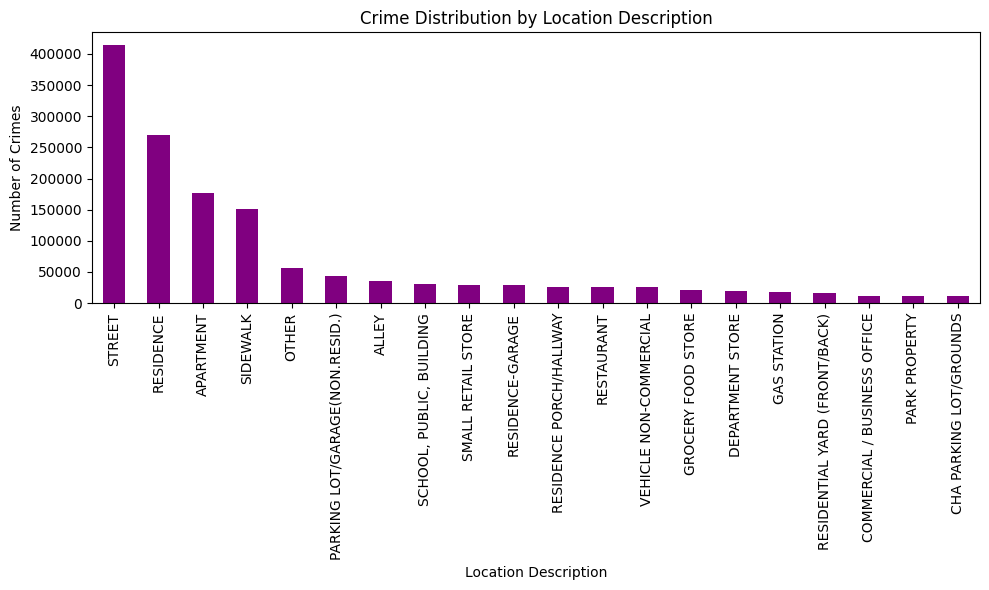

In [50]:
# Plot the crime distribution across different locations
crime_distribution_by_location = chicago_df1['Location Description'].value_counts()

plt.figure(figsize=(10, 6))
crime_distribution_by_location.head(20).plot(kind='bar', color='purple')
plt.title('Crime Distribution by Location Description')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [51]:
# Statistics

In [52]:
# What percentage of reported crimes result in arrests?
arrest_rate = chicago_df1['Arrest'].mean()
arrest_rate

0.26473682296753903

In [53]:
type_crime_by_location = chicago_df1.groupby(["Location Description", "Arrest"]).size().sort_values(ascending= False)
type_crime_by_location.head(10) # areas where arrest are prevailent

Location Description            Arrest
STREET                          False     298755
RESIDENCE                       False     232752
APARTMENT                       False     148685
STREET                          True      115234
SIDEWALK                        False      75564
                                True       75485
OTHER                           False      46538
RESIDENCE                       True       36437
PARKING LOT/GARAGE(NON.RESID.)  False      34252
APARTMENT                       True       28654
dtype: int64

In [54]:
#Are there any patterns in clearance rates for different types of crime? 
## Clearance rate refers to the percentage of reported crimes that are "cleared" by law enforcement. A crime is considered 
# "cleared" when at least one arrest is made or when the case is closed through exceptional means, such as death.

clearance_rates = chicago_df1.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)
clearance_rates.head(10)

Primary Type
PUBLIC INDECENCY                     1.000000
PROSTITUTION                         0.995820
NARCOTICS                            0.993991
GAMBLING                             0.991467
LIQUOR LAW VIOLATION                 0.991390
CONCEALED CARRY LICENSE VIOLATION    0.980488
INTERFERENCE WITH PUBLIC OFFICER     0.921466
WEAPONS VIOLATION                    0.750756
OBSCENITY                            0.740000
CRIMINAL TRESPASS                    0.704572
Name: Arrest, dtype: float64

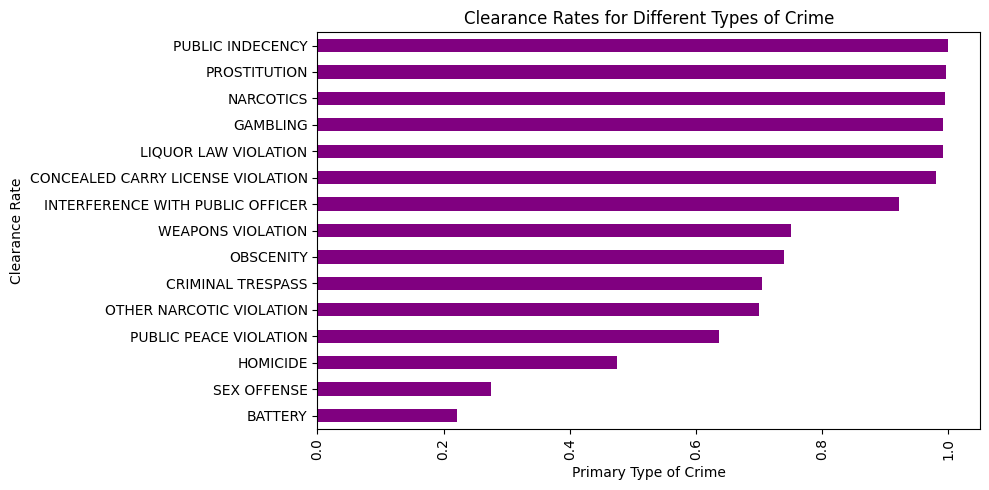

In [55]:
# Plot the clearance rates for different types of crime
clearance_rates = chicago_df1.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
clearance_rates.sort_values().plot(kind='barh', color='purple')
plt.title('Clearance Rates for Different Types of Crime')
plt.xlabel('Primary Type of Crime')
plt.ylabel('Clearance Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [56]:
# What percentage of reported crimes are domestic?
domestic_rate = chicago_df1["Domestic"].mean()
domestic_rate

0.13746343457343366

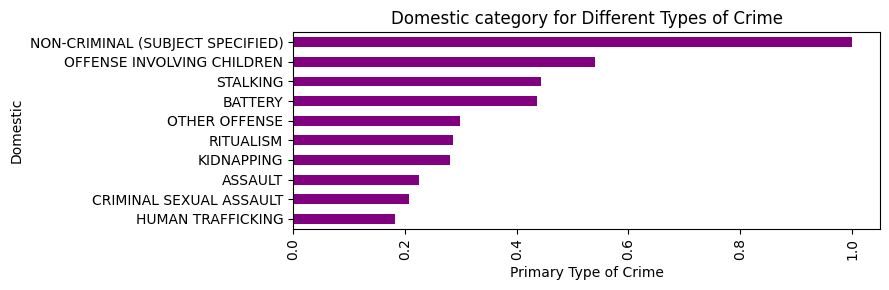

In [57]:
clearance_rates = chicago_df1.groupby('Primary Type')['Domestic'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(9, 3))
clearance_rates.sort_values().plot(kind='barh', color='purple')
plt.title('Domestic category for Different Types of Crime')
plt.xlabel('Primary Type of Crime')
plt.ylabel('Domestic')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [58]:
# What crime description are common in Chicago?
crime_by_description = chicago_df1.groupby(['Description']).size().sort_values(ascending=False)
crime_by_description.head(10)

Description
SIMPLE                          187611
$500 AND UNDER                  129046
DOMESTIC BATTERY SIMPLE         124859
TO VEHICLE                       88513
TO PROPERTY                      84504
OVER $500                        83662
AUTOMOBILE                       59258
FORCIBLE ENTRY                   59070
POSS: CANNABIS 30GMS OR LESS     58038
FROM BUILDING                    52784
dtype: int64

In [59]:
# District with highest and lowest crime rates
crime_by_district = chicago_df1.groupby(['District']).size().sort_values(ascending=False)

highest_crime_district = crime_by_district.idxmax()
highest_crime_count = crime_by_district.max()

lowest_crime_district = crime_by_district.idxmin()
lowest_crime_count = crime_by_district.min()

print(f"Highest crime district:\n{highest_crime_district} : {highest_crime_count}")
print(f"Lowest crime district:\n{lowest_crime_district} : {lowest_crime_count}")

Highest crime district:
8.0 : 108017
Lowest crime district:
31.0 : 41


In [60]:
# Ward with highest and lowest crime rates
crime_by_ward = chicago_df1.groupby(['Ward']).size().sort_values(ascending=False)

highest_crime_ward = crime_by_ward.idxmax()
highest_wardcrime_count = crime_by_ward.max()

lowest_crime_ward = crime_by_ward.idxmin()
lowest_wardcrime_count = crime_by_ward.min()

print(f"Highest crime Ward:\n{highest_crime_ward} : {highest_wardcrime_count}")
print(f"Lowest crime Ward:\n{lowest_crime_ward} : {lowest_wardcrime_count}")

Highest crime Ward:
28.0 : 67565
Lowest crime Ward:
19.0 : 13214


In [61]:
# Community Area with highest and lowest crime rates
crime_by_comarea= chicago_df1.groupby(['Community Area']).size().sort_values(ascending=False)

highest_crime_comarea = crime_by_comarea.idxmax()
highest_comcrime_count = crime_by_comarea.max()

lowest_crime_comarea = crime_by_comarea.idxmin()
lowest_comcrime_count = crime_by_comarea.min()

print(f"Highest crime Community Area:\n{highest_crime_comarea} : {highest_comcrime_count}")
print(f"Lowest crime Community Area:\n{lowest_crime_comarea} : {lowest_comcrime_count}")

Highest crime Community Area:
25.0 : 92191
Lowest crime Community Area:
0.0 : 11


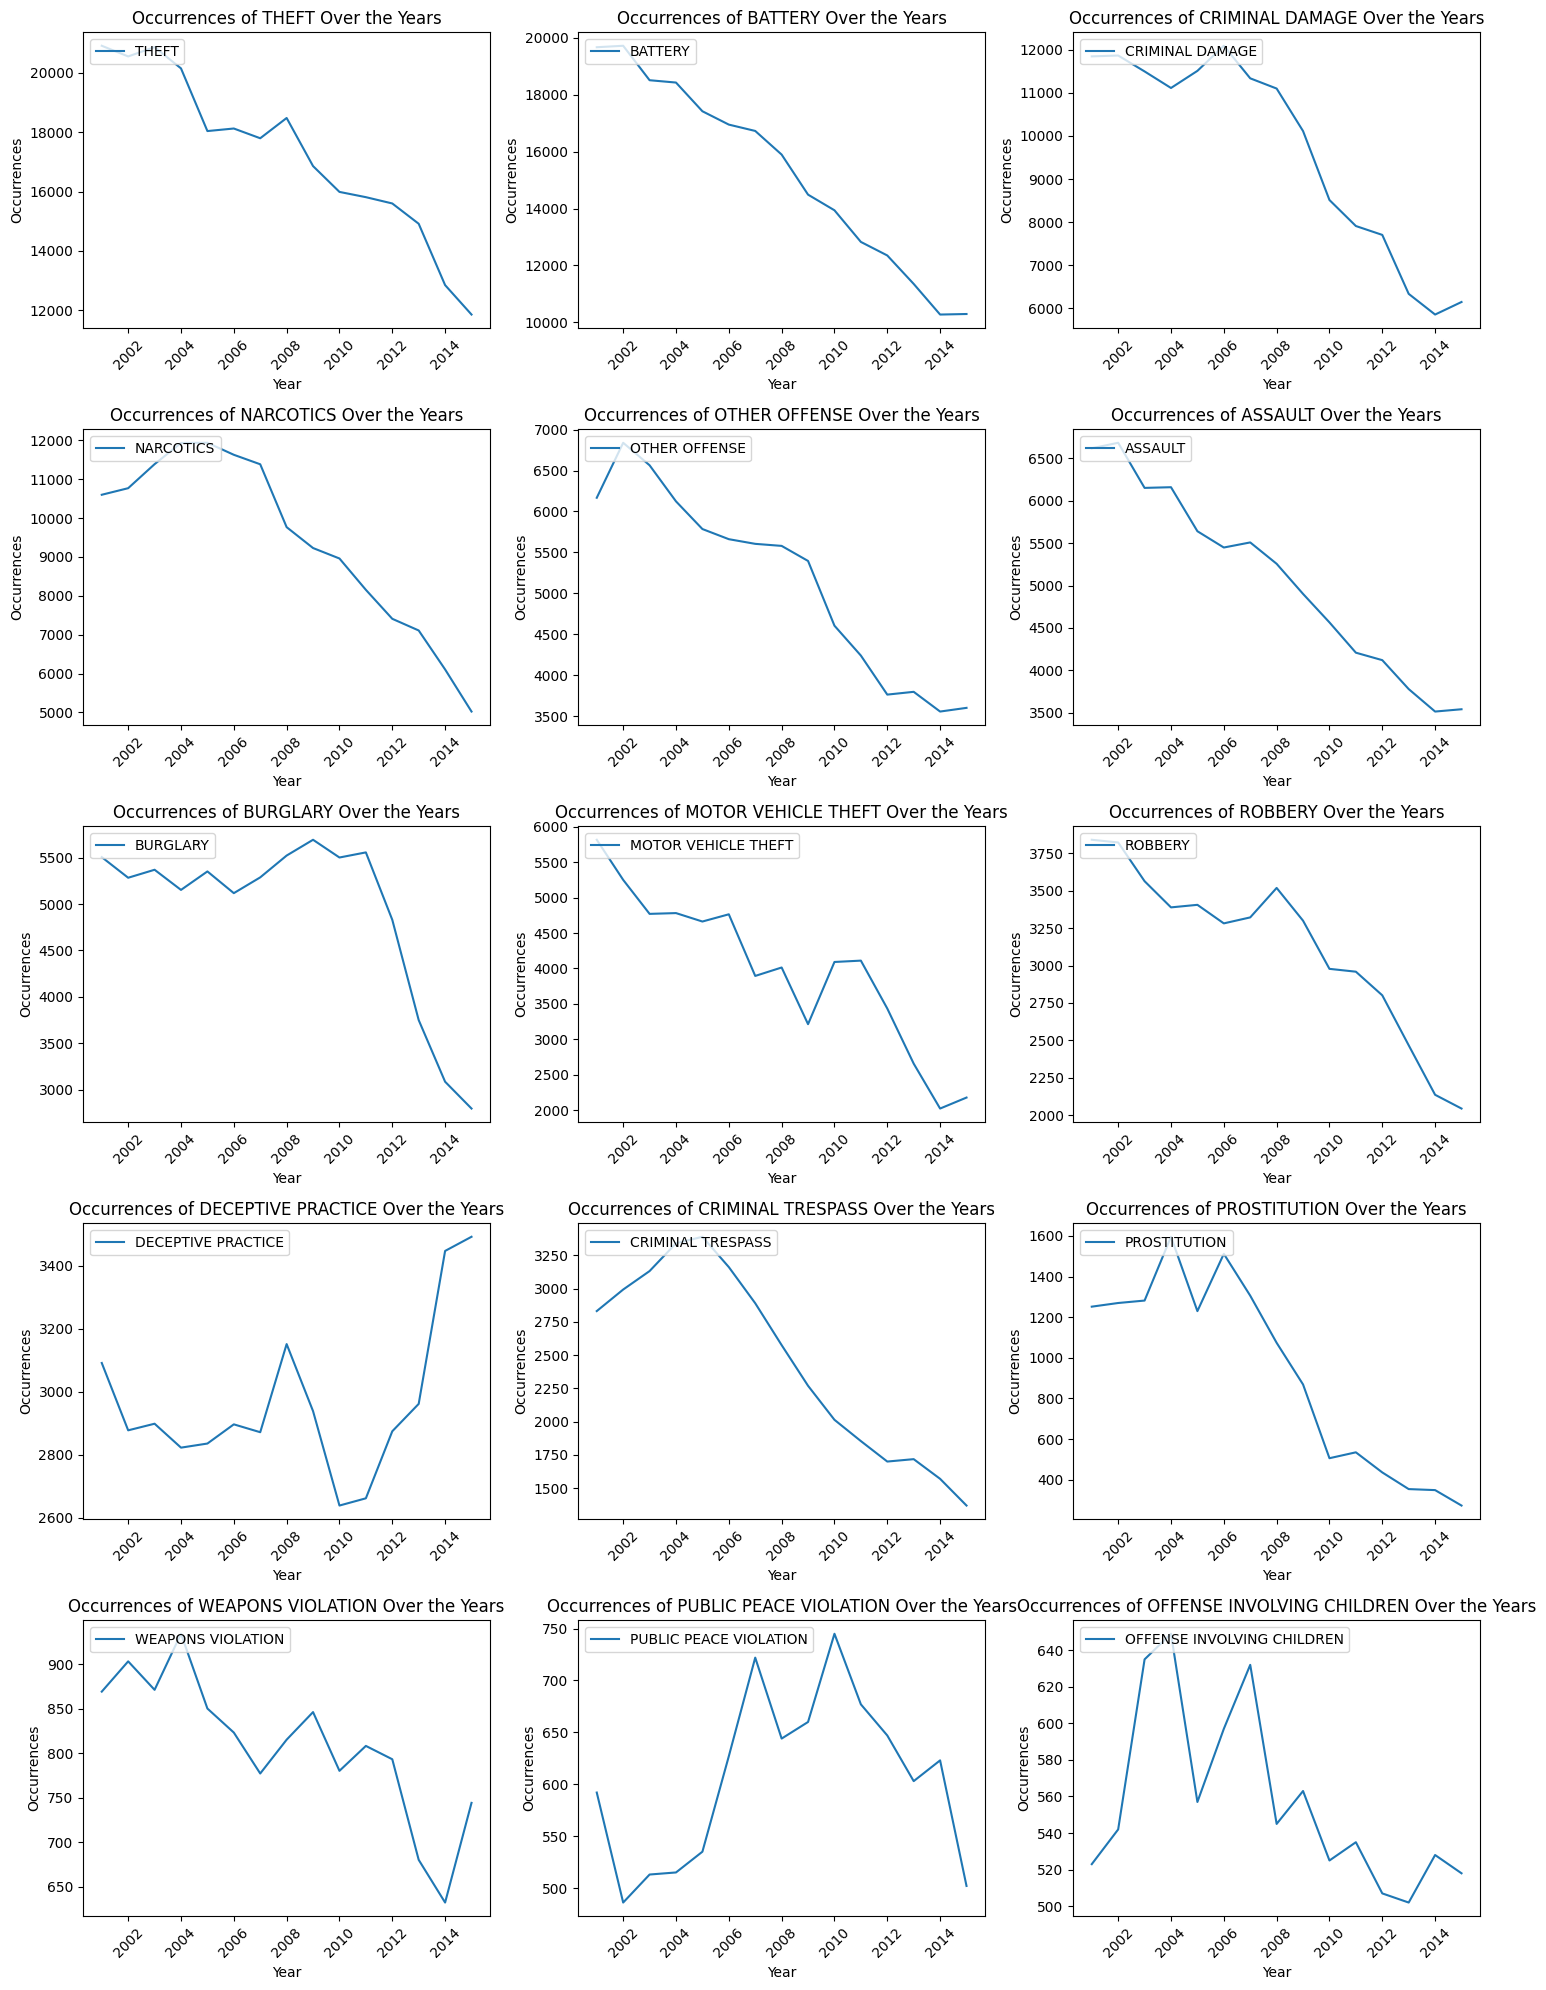

In [62]:
# Did the Types of crime change as years go by? if yes/no. let the data show the insight.
crime_by_year = chicago_df1.groupby(["Year","Primary Type"]).size().unstack().head(15)
top_types = crime_by_year.sum().nlargest(15).index

crime_by_year = crime_by_year[top_types]

fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each crime category and plot in the corresponding subplot
for i, crime in enumerate(crime_by_year.columns):
    sns.lineplot(data=crime_by_year[crime], ax=axes[i])
    axes[i].set_title(f'Occurrences of {crime} Over the Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Occurrences')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend([crime], loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()